In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation,GlobalAvgPool2D, GlobalMaxPool2D
from keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import cv2
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.mobilenet import MobileNet
import h5py

In [2]:
picture_size = 48
folder_path = "/content/data"

In [4]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/test/happy/im153.png  
  inflating: data/test/happy/im154.png  
  inflating: data/test/happy/im156.png  
  inflating: data/test/happy/im157.png  
  inflating: data/test/happy/im158.png  
  inflating: data/test/happy/im159.png  
  inflating: data/test/happy/im161.png  
  inflating: data/test/happy/im162.png  
  inflating: data/test/happy/im166.png  
  inflating: data/test/happy/im167.png  
  inflating: data/test/happy/im168.png  
  inflating: data/test/happy/im170.png  
  inflating: data/test/happy/im173.png  
  inflating: data/test/happy/im176.png  
  inflating: data/test/happy/im181.png  
  inflating: data/test/happy/im182.png  
  inflating: data/test/happy/im183.png  
  inflating: data/test/happy/im184.png  
  inflating: data/test/happy/im185.png  
  inflating: data/test/happy/im186.png  
  inflating: data/test/happy/im188.png  
  inflating: data/test/happy/im190.png  
  inflating: data/test/happy/im191.png  
  infl

In [3]:
batch_size  = 64

datagen_train  = ImageDataGenerator(rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3,
horizontal_flip=True,
fill_mode='nearest')


# datagen_train = ImageDataGenerator(rescale=1./255,
#                         featurewise_center=False,
#                         featurewise_std_normalization=False,
#                         rotation_range=10,
#                         width_shift_range=0.1,
#                         height_shift_range=0.1,
#                         zoom_range=.1,
#                         horizontal_flip=True)

# datagen_train = ImageDataGenerator(rescale = 1./255,     
#         rotation_range=5,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,
#         fill_mode='nearest')

datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
input_shape=(48,48,3)
num_classes=7
epochs=20
DENSE_LAYER_ACTIVATION='softmax'

In [6]:
# from keras.layers import Activation, Convolution2D, Dropout, Conv2D
# from keras.layers import AveragePooling2D, BatchNormalization
# from keras.layers import GlobalAveragePooling2D
# from keras.models import Sequential
# from keras.layers import Flatten
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import MaxPooling2D
# from keras.layers import SeparableConv2D
# from keras import layers
# from keras.regularizers import l2
# def cnn_model(input_shape, num_classes, l2_regularization=0.01):
#     regularization = l2(l2_regularization)
#     # base
#     img_input = Input(input_shape)
#     x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(img_input)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)

#     # module 1
#     residual = Conv2D(16, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
#     residual = BatchNormalization()(residual)

#     x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)

#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.add([x, residual])

#     # module 2
#     residual = Conv2D(32, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
#     residual = BatchNormalization()(residual)

#     x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)

#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.add([x, residual])

#     # module 3
#     residual = Conv2D(64, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
#     residual = BatchNormalization()(residual)

#     x = SeparableConv2D(64, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = SeparableConv2D(64, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)

#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.add([x, residual])

#     # module 4
#     residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
#     residual = BatchNormalization()(residual)

#     x = SeparableConv2D(128, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = SeparableConv2D(128, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
#     x = BatchNormalization()(x)

#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.add([x, residual])

#     x = Conv2D(num_classes, (3, 3), padding='same')(x)
#     x = GlobalAveragePooling2D()(x)
#     output = Activation('softmax', name='predictions')(x)

#     model = Model(img_input, output)
#     return model


In [ ]:
# model.add(base_model)
# model.add(Flatten())
# model.add(Dropout(0.4))
# model.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))
# model.add(Conv2D(256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Conv2D(128,kernel_size=(5,5),kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.6))
# model.add(Conv2D(num_classes, activation = DENSE_LAYER_ACTIVATION))


# cnn_model=model

In [5]:

mobile_net = MobileNet(
    input_shape = (48,48,3),
    include_top = False,
    weights = "imagenet",
    classes = num_classes
)
x = mobile_net.layers[-14].output
global_pool = GlobalMaxPool2D(name="global_pool")(x)
out = Dense(num_classes, activation="softmax", name="out_layer")(global_pool)

model = Model(inputs=mobile_net.input, outputs=out)
for layer in model.layers[:15]:
    layer.trainable = False

In [7]:
#ResNet50
# base_model=ResNet50(input_shape=input_shape,include_top = False, weights="imagenet",classes = num_classes)
# for layer in base_model.layers[:-4]:
#     layer.trainable=False

# model=Sequential()
# model.add(base_model)
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(32,kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32,kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32,kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(num_classes,activation=DENSE_LAYER_ACTIVATION))





In [6]:
cnn_model=model

In [7]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

In [8]:
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy',
                          patience=10
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                             mode="max",           
                             factor=0.2,
                             patience=5,
                             min_lr=0.00001,
                             verbose=1)

callbacks_list = [checkpoint,early_stopping,reduce_learningrate]

In [9]:

#model = cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
#train_faces, train_emotions = train_data
# model.fit_generator(data_generator.flow(train_faces, train_emotions, batch_size),
#                     steps_per_epoch=len(train_faces) / batch_size,
#                     epochs=num_epochs, verbose=0, callbacks=callbacks,
#                     validation_data=val_data)
history=model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list,
                                use_multiprocessing=True,
                                )

Epoch 1/20


<ipython-input-10-92d1c6855b49>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_set,


448/448 [==============================] - ETA: 0s - loss: 1.4577 - accuracy: 0.4615
Epoch 1: val_accuracy improved from -inf to 0.49679, saving model to model.h5
448/448 [==============================] - 302s 662ms/step - loss: 1.4577 - accuracy: 0.4615 - val_loss: 1.3612 - val_accuracy: 0.4968 - lr: 0.0010
Epoch 2/20
448/448 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.5489
Epoch 2: val_accuracy improved from 0.49679 to 0.56459, saving model to model.h5
448/448 [==============================] - 299s 667ms/step - loss: 1.1979 - accuracy: 0.5489 - val_loss: 1.1395 - val_accuracy: 0.5646 - lr: 0.0010
Epoch 3/20
448/448 [==============================] - ETA: 0s - loss: 1.1302 - accuracy: 0.5727
Epoch 3: val_accuracy did not improve from 0.56459
448/448 [==============================] - 297s 661ms/step - loss: 1.1302 - accuracy: 0.5727 - val_loss: 1.2193 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 4/20
448/448 [==============================] - ETA: 0s - loss:

In [13]:
model.save('model.h5')

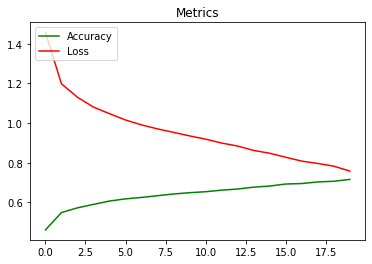

In [11]:
def plot_hist(history):
    plt.plot(history.history["accuracy"],color='green')
    plt.plot(history.history["loss"],color='red')
    plt.title("Metrics") 
    plt.legend(["Accuracy","Loss"], loc="upper left")
    plt.show()
plot_hist(history)

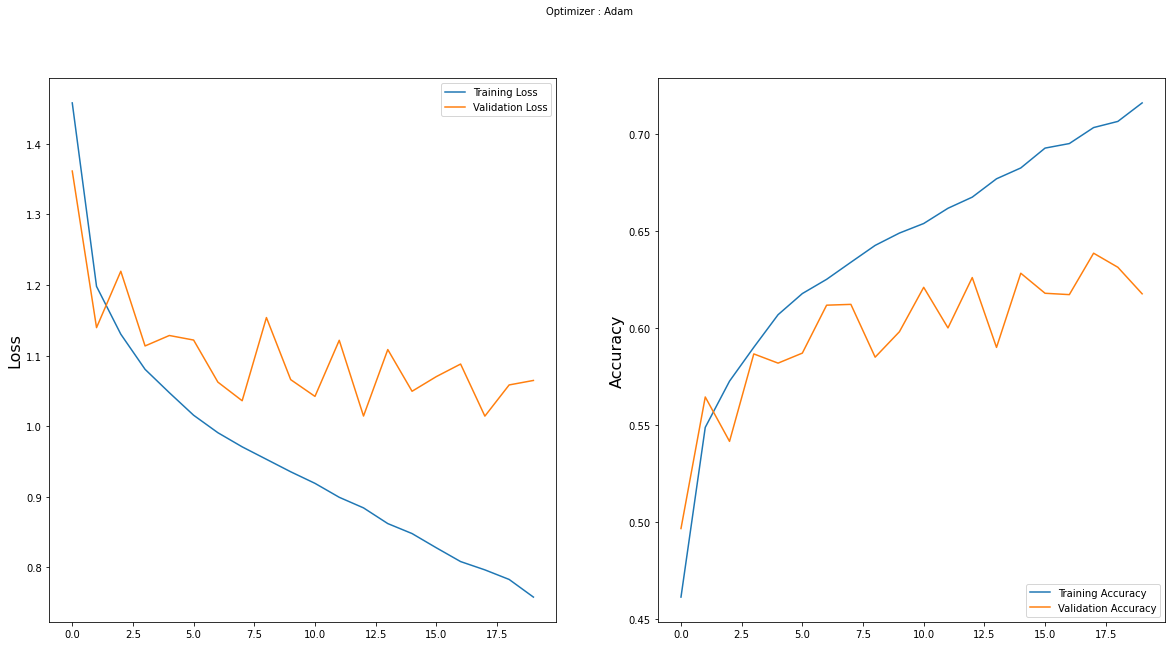

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()